In [2]:
import torch
import torchaudio
import requests
import matplotlib.pyplot as plt

/Users/juliushietala/junction_2020/j_env/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000
Wav dtype torch.float32


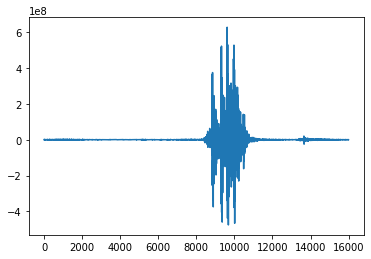

In [12]:


filename = "/Users/juliushietala/junction_2020/tensorflow-speech-recognition-challenge/train/audio/up/0c5027de_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filename, normalization=False)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))
print("Wav dtype", waveform.dtype)

plt.figure()
plt.plot(waveform.t().numpy());

Shape of fbank: torch.Size([79, 24])


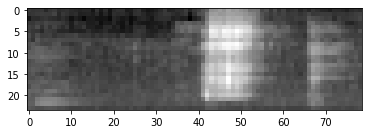

In [13]:
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0
#hamming, hanning, povey (default), rectangular, blackman
params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": True,
    "round_to_power_of_two": True,
    "sample_frequency": sample_rate,
    "num_mel_bins": 24
}

fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

print("Shape of fbank: {}".format(fbank.size()))

plt.figure()
plt.imshow(fbank.t().numpy(), cmap='gray');

Shape of spectrogram: torch.Size([2, 201, 686])


/Users/juliushietala/junction_2020/j_env/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  ../aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/Users/juliushietala/junction_2020/j_env/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  ../aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


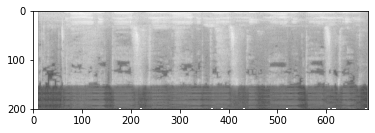

In [3]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray');

Shape of spectrogram: torch.Size([2, 128, 686])


/Users/juliushietala/junction_2020/j_env/lib/python3.7/site-packages/torchaudio/functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


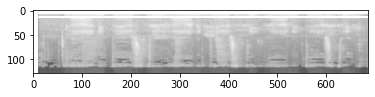

In [4]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)
print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray');

Shape of transformed waveform: torch.Size([1, 13709])


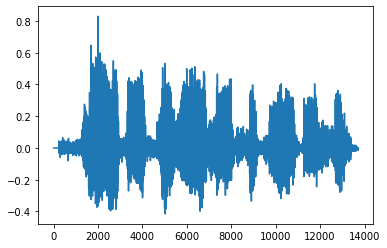

In [5]:
new_sample_rate = sample_rate/10

# Since Resample applies to a single channel, we resample first channel here
channel = 0
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

Shape of transformed waveform: torch.Size([1, 13709])


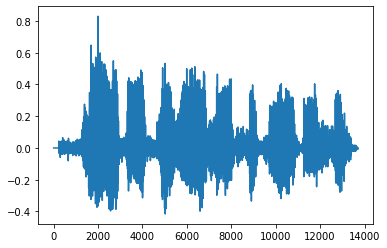

In [6]:
new_sample_rate = sample_rate/10

# Since Resample applies to a single channel, we resample first channel here
channel = 1
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

Shape of transformed waveform: torch.Size([1, 13709])


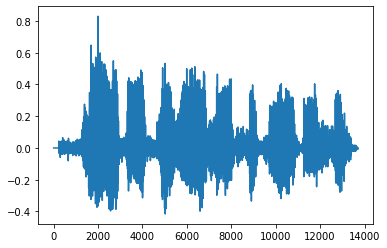

In [7]:

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

Shape of recovered waveform: torch.Size([1, 13709])


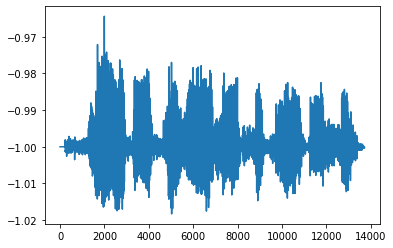

In [8]:
reconstructed = torchaudio.transforms.MuLawDecoding()(transformed)

print("Shape of recovered waveform: {}".format(reconstructed.size()))

plt.figure()
plt.plot(reconstructed[0,:].numpy())

Shape of spectrogram: torch.Size([684, 201])


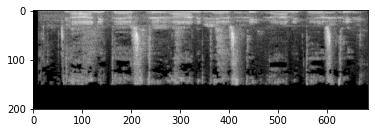

In [9]:
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

specgram = torchaudio.compliance.kaldi.spectrogram(waveform, **params)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.t().numpy(), cmap='gray');

Shape of fbank: torch.Size([684, 24])


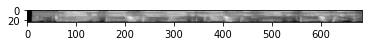

In [52]:
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0
#hamming, hanning, povey (default), rectangular, blackman
params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": True,
    "round_to_power_of_two": True,
    "sample_frequency": sample_rate,
    "num_mel_bins": 24
}

fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

print("Shape of fbank: {}".format(fbank.size()))

plt.figure()
plt.imshow(fbank.t().numpy(), cmap='gray');

In [15]:
print(fbank[683])

tensor([ -9.1885, -10.3211,  -9.5577, -10.4907,  -9.7387,  -8.0784,  -7.3184,
         -7.0578,  -6.9828,  -7.5598,  -7.7096,  -8.4808,  -7.5647,  -6.8857,
         -9.2372,  -8.7781,  -8.0808,  -8.8901,  -8.8337,  -7.0944,  -7.6763,
         -7.7669, -13.2102])


In [30]:
tens = torch.zeros((36,19,23))
fbank_row = 0
for row_idx,row in enumerate(tens):
    for col_idx, column in enumerate(row):
        tens[row_idx, col_idx] = fbank[fbank_row]
        fbank_row += 1

In [33]:
tens

tensor([[[-15.9424, -15.9424, -15.9424,  ..., -15.9424, -15.9424, -15.9424],
         [-15.9424, -15.9424, -15.9424,  ..., -15.9424, -15.9424, -15.9424],
         [-15.9424, -15.9424, -15.9424,  ..., -15.9424, -15.9424, -15.9424],
         ...,
         [ -5.5699,  -4.5303,  -3.7686,  ...,  -2.8160,  -4.0002,  -9.3854],
         [ -5.9301,  -6.9321,  -6.3438,  ...,  -7.5521,  -7.3893, -11.3998],
         [ -5.2343,  -6.3132,  -6.4947,  ...,  -8.3307,  -7.5747, -11.7367]],

        [[ -4.0080,  -4.5553,  -4.9632,  ...,  -7.3111,  -6.2407, -10.6794],
         [ -6.0452,  -5.2583,  -5.0570,  ...,  -7.1833,  -6.1445, -10.5593],
         [ -4.7600,  -4.3879,  -4.6387,  ...,  -6.6715,  -6.4727, -11.6603],
         ...,
         [ -4.9026,  -4.3891,  -5.7675,  ..., -10.7791,  -8.6237, -13.6548],
         [ -6.0485,  -5.7565,  -5.6493,  ...,  -8.6783,  -5.4851,  -9.4495],
         [ -5.1312,  -4.6920,  -5.5736,  ...,  -9.8110,  -7.0599, -10.7086]],

        [[ -6.9976,  -6.4107,  -6.2625,  ...